In [46]:
from helpers import *
import matplotlib.pyplot as plt

In [47]:
y, x, ids = load_csv_data("train.csv", sub_sample=False)

In [48]:
print(f'x.shape = {x.shape}')
print(f'y.shape = {y.shape}')

x.shape = (250000, 30)
y.shape = (250000,)


In [50]:
x_train, y_train = x[:200000], y[:200000]
x_validation, y_validation = x[200000:], y[200000:]

In [51]:
def plot_balance(y):
    counts = np.unique(y, return_counts=True)
    plt.bar(counts[0], counts[1], tick_label=['class 0', 'class 1']);
    plt.title('count of classes')
    plt.xlabel('class')
    plt.ylabel('count');

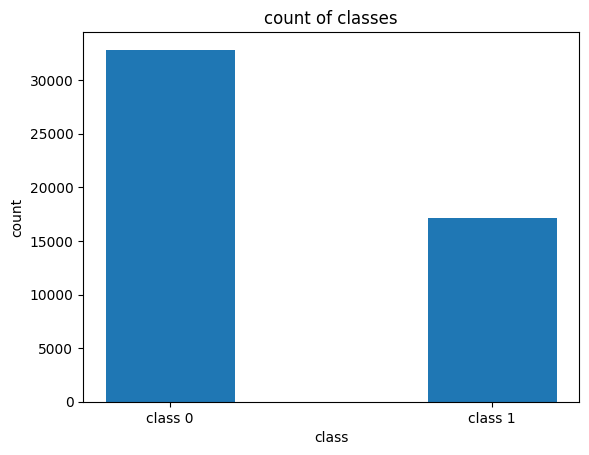

In [52]:
plot_balance(y_validation)

### Plotting missing percentages by columns

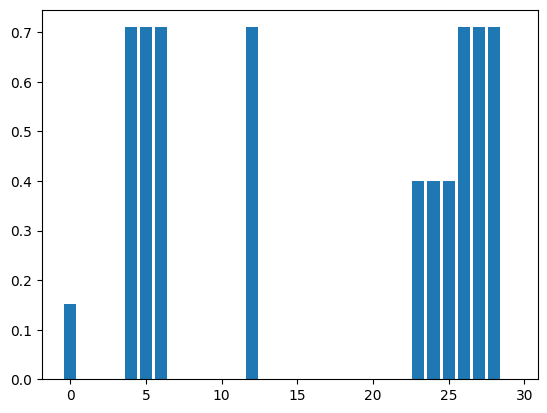

In [53]:
miss_perc = [np.sum(x_train[:, i] == -999) / x_train.shape[0] for i in range(x_train.shape[1])]
plt.bar(list(range(x_train.shape[1])), miss_perc);

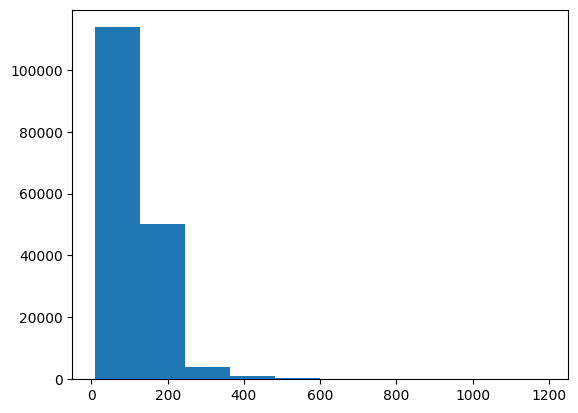

In [54]:
plt.hist(x_train[:, 0][x_train[:, 0] != -999]);

In [55]:
def find_mod(a):
    values, counts = np.unique(a, return_counts=True)
    ind = np.argmax(counts)
    return(values[ind])

In [56]:
def fill_missing(x_train, x_validation, col_idx, func):
    replace_val = func(x_train[:, col_idx])

    x_train[:, col_idx] = np.where(x_train[:, col_idx]!=-999, x_train[:, col_idx], replace_val)
    x_validation[:, col_idx] = np.where(x_validation[:, col_idx]!=-999, x_validation[:, col_idx], replace_val)
    return x_train, x_validation

In [57]:
def normalize(x):
    x_out = x.copy()
    x_out = x - np.mean(x, axis=0)
    x_out = x / np.var(x, axis=0)
    return x_out

In [58]:
def pca_transform(x_raw, n=5):
    x_std = normalize(x_raw)
    cov = np.cov(x_std.T)
    eig_values , eig_vectors = np.linalg.eig(cov)

    idx = eig_values.argsort()[::-1]
    eig_values = eig_values[idx]
    eig_vectors = eig_vectors[:,idx]

    x_transformed = x_raw[:, idx[:n]]

    return x_transformed, eig_values

In [59]:
def preprocess(x_train, x_validation, miss_threshold = 0.4):
    # remove missing columns
    miss_perc = [np.sum(x[:, i] == -999) / x.shape[0] for i in range(x.shape[1])]
    removing_columns = np.array(miss_perc) > miss_threshold
    x_train = x_train[:, ~removing_columns]
    x_validation = x_validation[:, ~removing_columns]

    # fill missing values for column 0
    x_train, x_validation = fill_missing(x_train, x_validation, 0, find_mod)

    x_train_transformed, x_train_eig_values = pca_transform(x_train, n=5)
    x_validation_transformed, x_validation_eig_values = pca_transform(x_validation, n=5)
    
    return x_train_transformed, x_validation_transformed, x_train_eig_values

In [60]:
def plot_ceverage(coverage, num_feature):
    plt.plot(coverage[:num_feature])
    plt.grid()
    plt.yticks(np.arange(0, 110, 5))
    plt.xlabel('number of features')
    plt.ylabel('coverage')
    plt.title('Cumulative Coverage Percent of Variance');

In [61]:
x_train_transformed, x_validation_transformed, x_train_eig_values = preprocess(x_train, x_validation)

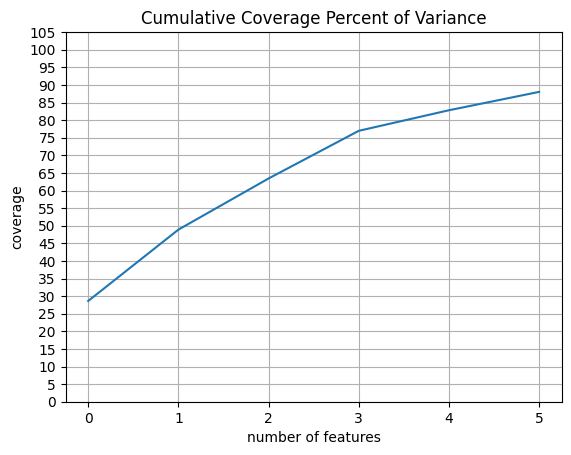

In [62]:
coverage_train = np.cumsum(x_train_eig_values) / np.sum(x_train_eig_values) * 100

plot_ceverage(coverage_train, 6)

In [64]:
print(f'x_train_transformed.shape ={x_train_transformed.shape}')
print(f'x_validation_transformed.shape ={x_validation_transformed.shape}')

x_train_transformed.shape =(200000, 5)
x_validation_transformed.shape =(50000, 5)
